<a href="https://colab.research.google.com/github/seemasafar/newrepo/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TRADITIONAL LSTM

In [23]:
from numpy import array
from numpy import cumsum
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
 
# create a sequence classification instance
def get_sequence(n_timesteps):
	# create a sequence of random numbers in [0,1]
	X = array([random() for _ in range(n_timesteps)])
	# calculate cut-off value to change class values
	limit = n_timesteps/4.0
	# determine the class outcome for each item in cumulative sequence
	y = array([0 if x < limit else 1 for x in cumsum(X)])
	# reshape input and output data to be suitable for LSTMs
	X = X.reshape(1, n_timesteps, 1)
	y = y.reshape(1, n_timesteps, 1)
	return X, y
 
# define problem properties
n_timesteps = 10
# define LSTM
model = Sequential()
model.add(LSTM(20, input_shape=(n_timesteps, 1), return_sequences=True))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train LSTM
for epoch in range(1000):
	# generate new random sequence
	X,y = get_sequence(n_timesteps)
	# fit model for one epoch on this sequence
	model.fit(X, y, epochs=1, batch_size=1, verbose=2)
# evaluate LSTM
X,y = get_sequence(n_timesteps)
yhat = model.predict_classes(X, verbose=0)
for i in range(n_timesteps):
	print('Expected:', y[0, i], 'Predicted', yhat[0, i])

Epoch 1/1
 - 0s - loss: 0.7242 - accuracy: 0.4000
Epoch 1/1
 - 0s - loss: 0.7175 - accuracy: 0.4000
Epoch 1/1
 - 0s - loss: 0.7136 - accuracy: 0.4000
Epoch 1/1
 - 0s - loss: 0.7159 - accuracy: 0.3000
Epoch 1/1
 - 0s - loss: 0.7146 - accuracy: 0.3000
Epoch 1/1
 - 0s - loss: 0.7017 - accuracy: 0.5000
Epoch 1/1
 - 0s - loss: 0.7048 - accuracy: 0.3000
Epoch 1/1
 - 0s - loss: 0.7004 - accuracy: 0.2000
Epoch 1/1
 - 0s - loss: 0.7027 - accuracy: 0.1000
Epoch 1/1
 - 0s - loss: 0.6953 - accuracy: 0.3000
Epoch 1/1
 - 0s - loss: 0.6939 - accuracy: 0.5000
Epoch 1/1
 - 0s - loss: 0.7016 - accuracy: 0.2000
Epoch 1/1
 - 0s - loss: 0.6882 - accuracy: 0.7000
Epoch 1/1
 - 0s - loss: 0.6886 - accuracy: 0.6000
Epoch 1/1
 - 0s - loss: 0.6866 - accuracy: 0.6000
Epoch 1/1
 - 0s - loss: 0.6801 - accuracy: 0.7000
Epoch 1/1
 - 0s - loss: 0.6884 - accuracy: 0.5000
Epoch 1/1
 - 0s - loss: 0.6804 - accuracy: 0.6000
Epoch 1/1
 - 0s - loss: 0.6725 - accuracy: 0.7000
Epoch 1/1
 - 0s - loss: 0.6615 - accuracy: 0.8000


Bi LSTM

Using TensorFlow backend.


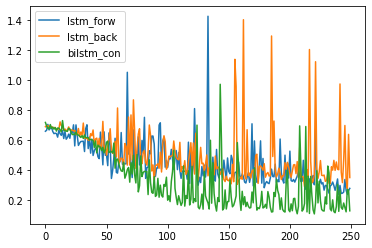

In [21]:
from random import random
from numpy import array
from numpy import cumsum
from matplotlib import pyplot
from pandas import DataFrame
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
 
# create a sequence classification instance
def get_sequence(n_timesteps):
	# create a sequence of random numbers in [0,1]
	X = array([random() for _ in range(n_timesteps)])
	# calculate cut-off value to change class values
	limit = n_timesteps/4.0
	# determine the class outcome for each item in cumulative sequence
	y = array([0 if x < limit else 1 for x in cumsum(X)])
	# reshape input and output data to be suitable for LSTMs
	X = X.reshape(1, n_timesteps, 1)
	y = y.reshape(1, n_timesteps, 1)
	return X, y
 
def get_lstm_model(n_timesteps, backwards):
	model = Sequential()
	model.add(LSTM(20, input_shape=(n_timesteps, 1), return_sequences=True, go_backwards=backwards))
	model.add(TimeDistributed(Dense(1, activation='sigmoid')))
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model
 
def get_bi_lstm_model(n_timesteps, mode):
	model = Sequential()
	model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(n_timesteps, 1), merge_mode=mode))
	model.add(TimeDistributed(Dense(1, activation='sigmoid')))
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model
 
def train_model(model, n_timesteps):
	loss = list()
	for _ in range(250):
		# generate new random sequence
		X,y = get_sequence(n_timesteps)
		# fit model for one epoch on this sequence
		hist = model.fit(X, y, epochs=1, batch_size=1, verbose=0)
		loss.append(hist.history['loss'][0])
	return loss
 
 
n_timesteps = 10
results = DataFrame()
# lstm forwards
model = get_lstm_model(n_timesteps, False)
results['lstm_forw'] = train_model(model, n_timesteps)
# lstm backwards
model = get_lstm_model(n_timesteps, True)
results['lstm_back'] = train_model(model, n_timesteps)
# bidirectional concat
model = get_bi_lstm_model(n_timesteps, 'concat')
results['bilstm_con'] = train_model(model, n_timesteps)
# line plot of results
results.plot()
pyplot.show()

Comparing Bidirectional LSTM Merge Modes

There a 4 different merge modes that can be used to combine the outcomes of the Bidirectional LSTM layers.

They are concatenation (default), multiplication, average, and sum.

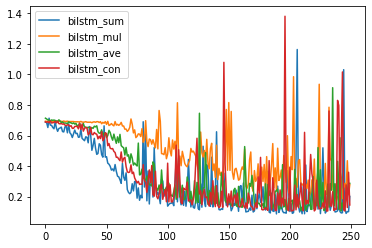

In [22]:
n_timesteps = 10
results = DataFrame()
# sum merge
model = get_bi_lstm_model(n_timesteps, 'sum')
results['bilstm_sum'] = train_model(model, n_timesteps)
# mul merge
model = get_bi_lstm_model(n_timesteps, 'mul')
results['bilstm_mul'] = train_model(model, n_timesteps)
# avg merge
model = get_bi_lstm_model(n_timesteps, 'ave')
results['bilstm_ave'] = train_model(model, n_timesteps)
# concat merge
model = get_bi_lstm_model(n_timesteps, 'concat')
results['bilstm_con'] = train_model(model, n_timesteps)
# line plot of results
results.plot()
pyplot.show()